# **Clusterização - (Agrupamento) de Consumidores**

## Machine Learning - Aprendizado Não Supervisionado

### Desenvolvimento de um projeto para uma empresa do setor de consultoria e marketing, com o objetivo de criar um modelo capaz de segmentar a base de dados de consumidores com base em seus interesses e criar agrupamentos.<br>Essa abordagem permitirá a elaboração de campanhas de marketing mais eficazes e direcionadas aos grupos específicos.

In [68]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import joblib
import numpy as np
import seaborn as sns

In [69]:
# Tratamento de warnings

import warnings
warnings.filterwarnings('ignore')

# Coletando e ajustando dados

In [70]:
# Leitura e Carga do Arquivo de Dados

df_dados_mkt = pd.read_csv('dados_mkt.csv')

In [71]:
# Volume (Linhas x Colunas)

df_dados_mkt.shape

(12992, 27)

In [72]:
# Informações

df_dados_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [73]:
# Algumas Linhas

df_dados_mkt.sample(6)

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
7260,F,25,15,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
11699,M,28,76,0,0,0,0,0,0,0,...,0,0,50,0,0,0,0,0,0,20
3353,F,27,26,0,0,0,0,0,0,0,...,0,0,0,10,0,20,0,0,0,0
6456,F,28,9,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
8210,F,26,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
4053,F,28,19,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0


In [74]:
# Verifica Valores Nulos

df_dados_mkt.isnull().sum()

sexo                 0
idade                0
numero_de_amigos     0
basquete             0
futebol_americano    0
futebol              0
softbol              0
voleibol             0
natacao              0
animacao             0
beisebol             0
tenis                0
esportes             0
fofo                 0
danca                0
banda                0
marcha               0
musica               0
rock                 0
cabelo               0
vestido              0
shopping             0
compras              0
roupas               0
nossa_marca          0
marca_concorrente    0
bebidas              0
dtype: int64

In [75]:
# Verifica Valores Não Numericos

df_dados_mkt.isna().sum()

sexo                 0
idade                0
numero_de_amigos     0
basquete             0
futebol_americano    0
futebol              0
softbol              0
voleibol             0
natacao              0
animacao             0
beisebol             0
tenis                0
esportes             0
fofo                 0
danca                0
banda                0
marcha               0
musica               0
rock                 0
cabelo               0
vestido              0
shopping             0
compras              0
roupas               0
nossa_marca          0
marca_concorrente    0
bebidas              0
dtype: int64

In [76]:
# Analisando a única coluna categorica (tipo object)

df_dados_mkt['sexo'].unique()

array(['F', 'M', 'NE'], dtype=object)

## Aplicando encoder

In [77]:
# Cria um objeto aplicando OneHotEncode para valores da coluna sexo

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']], sparse_output = False)

In [78]:
# Criando encoder dos valores da coluna sexo

sexo_codificado = encoder.fit_transform(df_dados_mkt[['sexo']])
sexo_codificado

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], shape=(12992, 3))

In [79]:
# Criando um dataframe com a coluna sexo codificada

df_codificado = pd.DataFrame(sexo_codificado, columns = encoder.get_feature_names_out(['sexo']))
df_codificado

,sexo_F,sexo_M,sexo_NE
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
12987,1.0,0.0,0.0
12988,1.0,0.0,0.0
12989,1.0,0.0,0.0
12990,1.0,0.0,0.0


In [80]:
# Concatenando as informações em um novo dataframa

novo_df_dados_mkt = pd.concat([df_dados_mkt, df_codificado], axis = 1)
novo_df_dados_mkt.sample(5)

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
11603,F,26,195,0,0,0,0,0,20,0,...,0,10,0,0,0,0,0,1.0,0.0,0.0
6378,F,29,34,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12053,F,25,8,0,0,0,0,0,10,0,...,0,20,0,10,0,0,10,1.0,0.0,0.0
4229,F,27,19,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,1.0,0.0,0.0
37,F,26,22,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [81]:
# Removendo a coluna sexo

novo_df_dados_mkt = novo_df_dados_mkt.drop('sexo', axis = 1)

In [82]:
# Forma final do dataframe

novo_df_dados_mkt.sample(10)

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
11897,25,0,10,0,0,0,0,0,0,0,...,10,0,10,0,0,0,0,1.0,0.0,0.0
9535,28,9,10,40,0,0,0,0,0,10,...,0,10,0,10,10,10,0,0.0,1.0,0.0
6791,26,33,0,0,0,0,0,0,0,0,...,0,20,10,0,0,0,0,1.0,0.0,0.0
6611,25,46,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
12873,28,21,0,0,0,0,50,0,0,0,...,0,0,10,0,0,0,0,1.0,0.0,0.0
6477,27,86,0,0,0,0,0,0,0,0,...,10,0,10,0,0,0,0,1.0,0.0,0.0
10237,28,40,0,0,0,0,0,0,0,0,...,0,20,0,0,0,0,0,1.0,0.0,0.0
93,28,57,0,0,0,0,0,10,0,0,...,0,0,0,0,0,10,0,1.0,0.0,0.0
5735,29,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,1.0,0.0,0.0
3057,27,15,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0.0,1.0,0.0


## Ensinamento Adicional

Quando você tem mais de uma coluna categórica, pode aplicar a técnica de codificação "OneHotEncoder" para várias colunas de uma vez.  
Para isso, você pode passar uma lista de listas com os valores das categorias para o parâmetro categories ou usar o ColumnTransformer para aplicar diferentes codificações em diferentes colunas.

In [83]:
# # Exemplo de DataFrame
# data = {'Sexo': ['F', 'M', 'M', 'NE'],
#         'Cor': ['Azul', 'Verde', 'Azul', 'Amarelo']}
# df = pd.DataFrame(data)

# # Definir o encoder
# encoder = OneHotEncoder(sparse_output=False)

# # Codificar as colunas
# encoded_data = encoder.fit_transform(df[['Sexo', 'Cor']])

# # Exibir o resultado codificado
# print(encoded_data)

### Transformando o objeto encoder em um PKL

Um arquivo com a extensão .pkl é um arquivo de "pickle", que é utilizado no Python para serializar (ou "empacotar") objetos em um formato binário.  
A serialização permite que você armazene objetos Python, como listas, dicionários, ou modelos de aprendizado de máquina, em um arquivo, para que possam ser salvos e carregados posteriormente.  
O processo de serialização é chamado de pickling e o processo de desserialização (ou "desempacotamento") é chamado de unpickling.  
Usos comuns de arquivos .pkl:
 - Armazenamento de Modelos de Aprendizado de Máquina: Você pode salvar modelos treinados em arquivos .pkl e carregá-los posteriormente para fazer previsões sem precisar treinar o modelo novamente.  
 - Armazenamento de Dados Complexos: Se você tem objetos Python complexos (como listas de objetos ou grandes dicionários) que deseja salvar em disco, pode usar o formato .pkl para armazená-los.  
 - Troca de Dados Entre Processos: Também é usado para enviar objetos Python entre processos diferentes, já que a serialização permite que dados sejam transmitidos como um fluxo de bytes.

In [84]:
# Serialização (empacotamento do encoder)

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Desenvolvendo o modelo

In [85]:
# Define uma semente para garantir a reprodutibilidade

semente = 42

In [86]:
# Define o modelo utilizando K-MEANS do Sklearn
# Define que queremos a criação de 2 clusters (grupos)

tipo_modelo = KMeans(n_clusters = 2, random_state = semente)

In [87]:
# Treinamento do modelo

modelo = tipo_modelo.fit(novo_df_dados_mkt)

# Avaliando o K-means (Inércia e Silhueta)

A inércia é uma medida que nos permite avaliar a qualidade dos clusters, pois retorna a soma das distâncias ao quadrado entre os pontos dentro do cluster e seu centroide.  
A silhueta retorna o valor para a separação e coesão dos pontos dentro de um cluster, comparando-os em relação aos pontos próximos dentro de si e de outro cluster próximo.

In [88]:
# Valor de Inércia

modelo.inertia_

24912957.59458856

In [89]:
# Silhueta

silhouette_score(novo_df_dados_mkt, modelo.predict(novo_df_dados_mkt))

np.float64(0.3799715886302017)

Esses valores de silhueta são dados para cada ponto ou amostra que o K-Means agrupou dentro de um cluster.  
Os valores variam entre 1 e -1, sendo 1 um valor ótimo, indicando que o ponto está bem agrupado dentro do cluster.  
Quanto mais próximo de zero, mais próximo o ponto estará das fronteiras do cluster.  
Quando o valor é negativo, próximo a -1, significa que o ponto provavelmente está agrupado de forma errada, num cluster onde não deveria estar.

## Avaliando métricas para diferentes K

### Vamos fazer uma função para treinar o modelo em diferentes números de cluster para que possamos comparar os resultados

In [90]:
# Definição da Função

def avaliacao(dados, semente):

    inercia = []   # vetor de resultados de inercia
    silhueta = []  # vetor de resultados de silhueta

    for k in range(2,21): # de 2 até 20 clusters
        kmeans = KMeans(n_clusters = k, random_state = semente, n_init = 'auto')
        kmeans.fit(dados)
        valor_inercia = kmeans.inertia_
        valor_silhueta = silhouette_score(dados, kmeans.predict(dados))
        inercia.append(valor_inercia)
        silhueta.append(valor_silhueta)
        # Exibe os Resultados
        print (f'K = {k}   - {round(valor_inercia,4)} - {round(valor_silhueta,4)}')
    return silhueta, inercia

In [91]:
# Chamada da Função

print ('CLUSTER - INÉRCIA       - SILHUETA')
silhueta, inercia = avaliacao(novo_df_dados_mkt, semente)

CLUSTER - INÉRCIA       - SILHUETA
K = 2   - 24912957.5946 - 0.38
K = 3   - 21861120.3628 - 0.2634
K = 4   - 20611924.0789 - 0.275
K = 5   - 19344802.968 - 0.1818
K = 6   - 18682337.8389 - 0.1402
K = 7   - 18040926.9883 - 0.1509
K = 8   - 17260879.4783 - 0.1449
K = 9   - 16464957.2128 - 0.1538
K = 10   - 16007980.1663 - 0.1574
K = 11   - 15646256.112 - 0.1595
K = 12   - 15358902.6387 - 0.1607
K = 13   - 15095224.3997 - 0.1617
K = 14   - 14729471.6227 - 0.1507
K = 15   - 14374065.9172 - 0.1502
K = 16   - 14223897.1439 - 0.1469
K = 17   - 14015760.3566 - 0.1572
K = 18   - 13850221.8353 - 0.1418
K = 19   - 13479741.6811 - 0.1273
K = 20   - 13331340.461 - 0.1287


#### O melhor resultado de silhueta foi para 2 clusters (0.38) mas mesmo assim NOSSO MODELO ESTÁ RUIM !!!!!

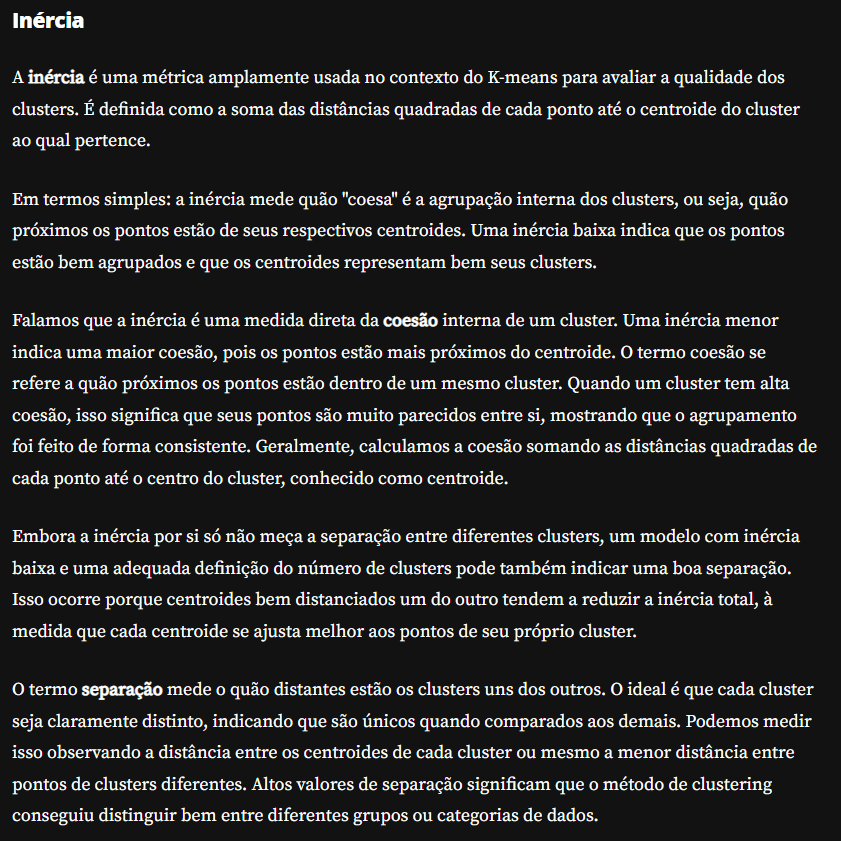

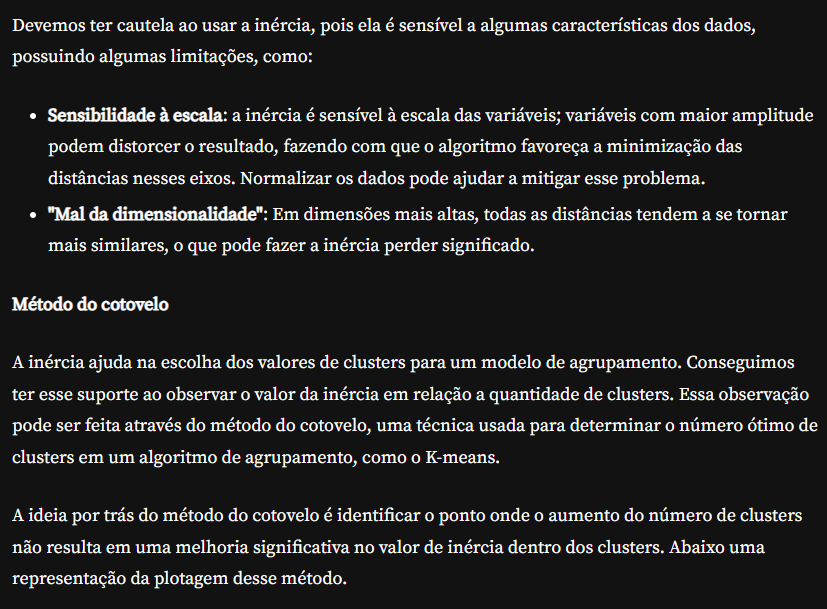

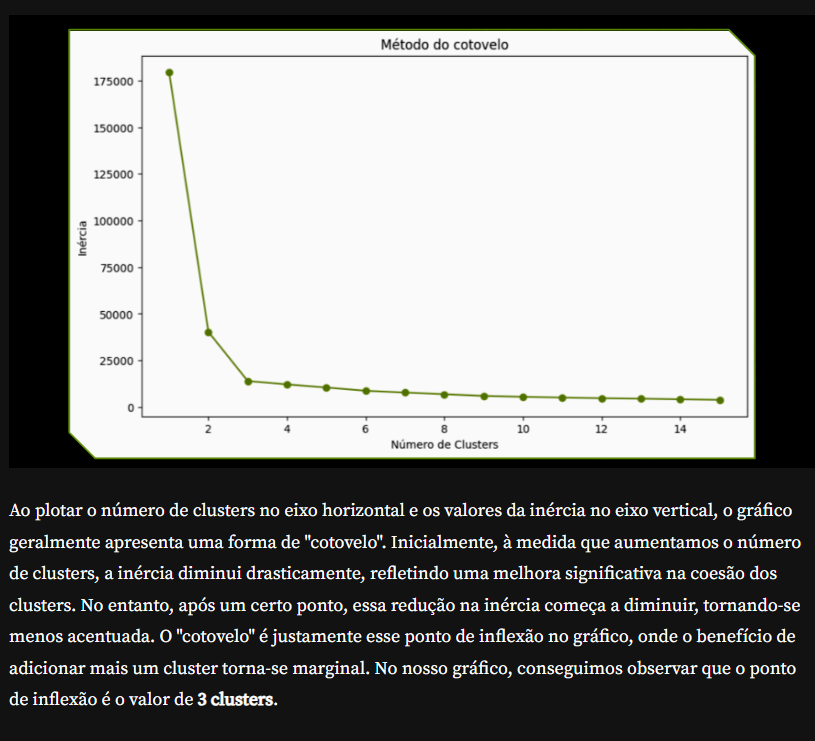

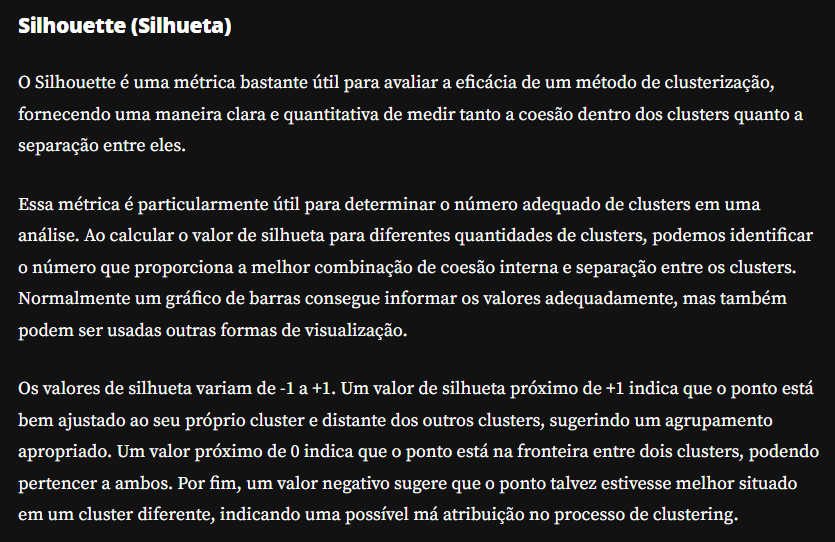

## Aula 2.3 - Verificando a silhueta por amostras

In [92]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados, semente):

  # Aplica o KMeans ao conjunto de dados
  kmeans = KMeans(n_clusters = n_clusters, random_state = semente, n_init = 'auto')
  cluster_previsoes = kmeans.fit_predict(dados)

  # Calcula o silhouette score médio
  silhueta_media = silhouette_score(dados, cluster_previsoes)
  print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

  # Calcula a pontuação de silhueta para cada amostra
  silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

  # Configuração da figura para o gráfico de silhueta
  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(9, 7)

  # Limites do gráfico de silhueta
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
      ith_cluster_silhueta_amostra.sort()

      tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
      y_upper = y_lower + tamanho_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 para o espaço entre gráficos

  # Linha vertical para a média do Silhouette Score
  ax1.axvline(x=silhueta_media, color='red', linestyle='--')

  ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
  ax1.set_xlabel('Valores do coeficiente de silhueta')
  ax1.set_ylabel('Rótulo do cluster')

  ax1.set_yticks([])  # Remove os ticks do eixo y
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])

  plt.show()

Valor médio para 2 clusters: 0.380


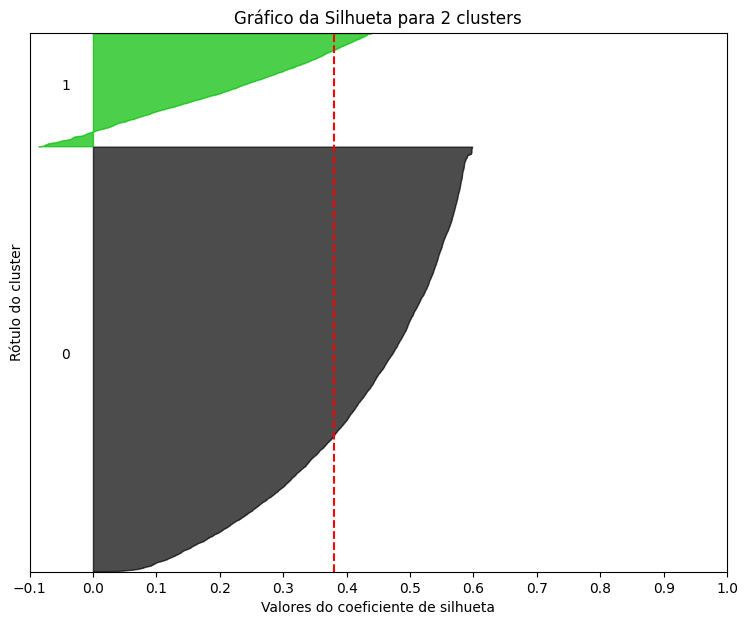

In [93]:
# Chama da Função

graf_silhueta (2, novo_df_dados_mkt, semente)

### Outras visualizações

In [94]:
# Metodo do Cotovelo

def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21),inercia,'bo-')  # b = blue   o = marca os pontos    - = Liha reta
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

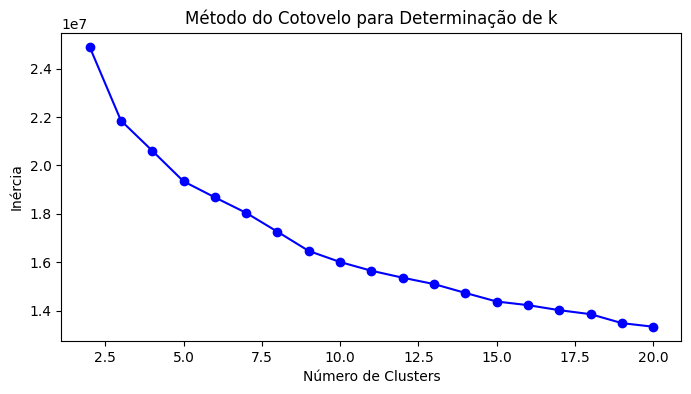

In [95]:
# hama função do gráfico

plot_cotovelo(inercia)

# Avaliação e ajuste de dados

Criamos um modelo KMeans para segmentar essas pessoas consumidoras!  
No entanto, após uma avaliação, percebemos que a qualidade das segmentações não atingiu um nível satisfatório.  
Agora, é necessário analisarmos a estrutura dos dados e identificarmos características que possam estar impactando negativamente a segmentação realizada pelo modelo KMeans.  
Uma característica relevante para modelos como o KMeans é a escala dos dados. Avaliar essa escala é fundamental porque o KMeans utiliza distâncias euclidianas para determinar a similaridade entre os pontos e os centróides dos clusters.  
Quando lidamos com características que apresentam escalas muito diferentes como idade em anos e número de seguidores, a característica com maior escala pode dominar o cálculo das distâncias.  
Isso resulta em uma distorção na segmentação dos clusters, comprometendo a qualidade dos resultados.  
Portanto, é essencial garantir que todas as características estejam na mesma escala antes de aplicar o modelo.

In [96]:
# Analisando os dados

novo_df_dados_mkt.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,26.852679,31.283790,3.063424,2.927186,2.536946,1.836515,1.641010,1.548645,1.207666,1.198430,...,1.340055,2.977986,4.094828,1.720289,0.819735,0.589594,1.050647,0.761469,0.166256,0.072275
std,1.203746,35.891178,8.374443,7.431099,9.810703,7.881526,6.818708,5.862203,5.376673,5.558905,...,4.934874,7.479126,7.670547,5.092112,3.799795,2.999547,4.492218,0.426202,0.372325,0.258953
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,28.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,30.000000,605.000000,220.000000,90.000000,220.000000,170.000000,140.000000,310.000000,80.000000,140.000000,...,70.000000,120.000000,110.000000,80.000000,80.000000,80.000000,80.000000,1.000000,1.000000,1.000000


Observamos que as idades variam de 21 a 30 anos, enquanto o número de amigos pode chegar a 605, e a característica relacionada ao futebol varia de 0 a 200, ou seja, nossos dados não estão normalizados e pode ser esse o motivo de o nosso modelo não ter um bom desempenho.  Portanto, vamos então NORMALIZAR nossos dados

In [97]:
# Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

# Cria o objeto
scaler = MinMaxScaler()

# Normaliza
dados_escalados = scaler.fit_transform(novo_df_dados_mkt)

In [98]:
# Exibe o tipo da variável

type(dados_escalados)

numpy.ndarray

In [99]:
# Convertendo para um dataframe

dados_escalados = pd.DataFrame(dados_escalados, columns = novo_df_dados_mkt.columns)

In [100]:
# Analisando os dados escalados

dados_escalados.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,0.004996,0.015096,0.008560,...,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133,0.761469,0.166256,0.072275
std,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,0.018910,0.067208,0.039706,...,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153,0.426202,0.372325,0.258953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora todos os valores estão entre 0  1

Como precisamos disponibilizar esse modelo posteriormente, também teremos que manter o normalizador, o scaler. Para isso, salvamos o objeto utilizando a joblib:

In [101]:
# Salva o normalizador

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Para saber mais :

Durante o projeto aplicamos um algoritmo que muda as escalas dos nossos dados, o MinMaxScaler, mas por que esse passo é tão importante em um projeto com o modelo K-means?  
O K-means é um algoritmo de agrupamento que busca dividir os dados em grupos chamados clusters, onde os pontos dentro de cada cluster são mais semelhantes entre si do que com os pontos de outros clusters. O K-means realiza isso atribuindo cada ponto de dados ao cluster cujo centroide (o ponto central do cluster) está mais próximo. A proximidade entre os pontos e os centroides é medida utilizando a distância euclidiana, que calcula a distância reta entre dois pontos no espaço.  
No entanto, um dos aspectos importantes a se considerar no K-means é que ele é muito sensível à escala dos dados. Isso acontece porque a distância euclidiana, utilizada para decidir a qual cluster cada ponto pertence, leva em consideração diretamente os valores numéricos das variáveis. Se os diferentes atributos dos dados tiverem escalas muito diferentes, isso pode distorcer os resultados do agrupamento.  
Por exemplo, imagine que estamos agrupando dados de pessoas com duas características: idade (em anos) e número de seguidores. Se a idade varia entre 18 e 30 anos, e o número de seguidores varia entre 10.000 e 100.000 seguidores, o impacto do número de seguidores nas distâncias será muito maior do que o impacto da idade, simplesmente porque os valores de número de seguidores são numericamente muito maiores. Como resultado, o K-means dará muito mais peso ao número de seguidores ao formar os clusters, mesmo que a idade também seja uma característica importante.  
Para resolver esse problema, aplicamos algoritmos de escalonamento, como o MinMaxScaler ou o StandardScaler. O MinMaxScaler transforma os valores dos dados para um intervalo fixo, geralmente entre 0 e 1, enquanto o StandardScaler padroniza os dados para que tenham média zero e desvio padrão 1. Esses algoritmos ajustam os dados para que todos os atributos sejam comparáveis em termos de magnitude, evitando que variáveis com valores muito maiores dominem o cálculo das distâncias.

## Verificando as métricas para os novos dados

In [102]:
# Chamada da Função

print ('CLUSTER - INÉRCIA       - SILHUETA')
silhueta, inercia = avaliacao(dados_escalados, semente)

CLUSTER - INÉRCIA       - SILHUETA
K = 2   - 2427.7399 - 0.6685
K = 3   - 1116.2815 - 0.7448
K = 4   - 987.9584 - 0.3177
K = 5   - 944.07 - 0.3134
K = 6   - 916.2129 - 0.2216
K = 7   - 904.8509 - 0.1807
K = 8   - 861.4339 - 0.2633
K = 9   - 838.7152 - 0.1894
K = 10   - 831.2539 - 0.1728
K = 11   - 811.7139 - 0.1759
K = 12   - 809.2818 - 0.1749
K = 13   - 784.6835 - 0.1585
K = 14   - 780.9889 - 0.1611
K = 15   - 769.627 - 0.1203
K = 16   - 753.5277 - 0.121
K = 17   - 739.4735 - 0.1227
K = 18   - 722.1762 - 0.1263
K = 19   - 716.9062 - 0.1473
K = 20   - 713.5048 - 0.1471


Temos os resultados da nossa função de avaliação e, de maneira interessante, já no valor de K igual a 3, observamos uma melhora significativa no valor médio de silhueta para os dados escalados. Anteriormente, o melhor valor de silhueta que conseguimos foi 0,38.  
Agora, temos o valor de 0,74, que está bem mais próximo de 1. Como esse foi o melhor valor de silhueta obtido para K igual a 3, ou seja, para 3 clusters, podemos iniciar uma análise mais aprofundada da distribuição dos valores de silhueta por amostra para esse número de clusters.  
Também preparamos uma função para avaliar a distribuição, chamada graf_silhueta() passando o valor 3 por se referir a quantidade de clusters. Na sequência, inserimos uma vírgula e passamos os dados_escalados.

Valor médio para 3 clusters: 0.745


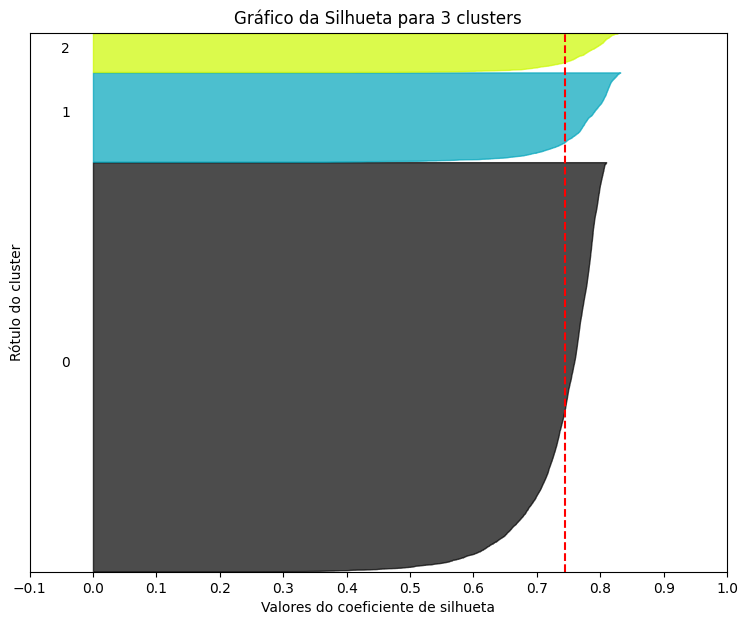

In [103]:
# Chamada da função

graf_silhueta(3, dados_escalados, semente)

### Verificando os valores de Inércia

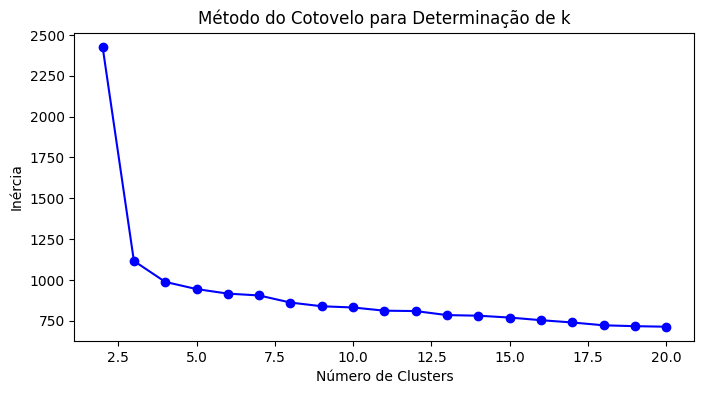

In [104]:
# Verificando a Inercia através do grafico de cotovelo

plot_cotovelo(inercia)

### Compare os graficos

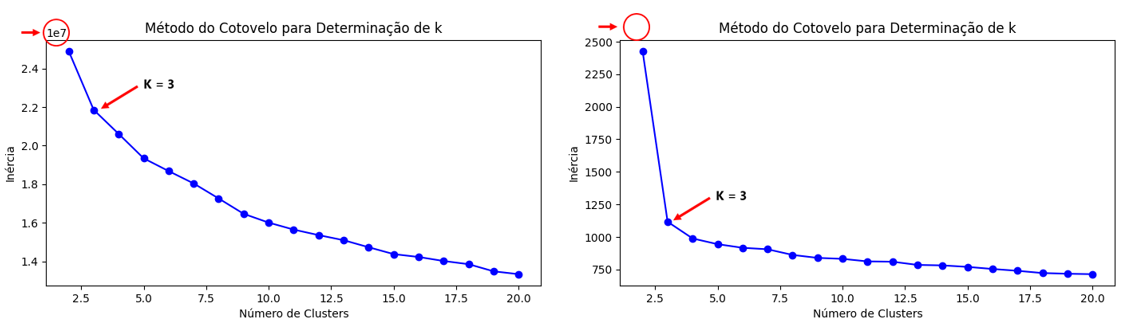

Observamos um resultado interessante: quando K é igual a 3, que corresponde ao segundo ponto da nossa reta, identificamos uma quebra no gráfico, formando um cotovelo. A partir desse ponto, a reta de inércia apresenta apenas uma leve inclinação.  
É esperado que os valores de inércia diminuam à medida que aumentamos a quantidade de clusters. No entanto, percebemos que após K igual a 3, não há mais uma discrepância significativa nos valores ou uma quebra abrupta como ocorreu de K igual a 2 para K igual a 3.  
Dessa forma, concluímos que 3 clusters é um ótimo valor para o nosso modelo KMeans.  
Outra observação relevante é a escala dos valores de inércia. Anteriormente, a escala estava em 10 elevado a 7, mas agora os valores se aproximam de 1.000 e caem um pouco mais após esse ponto.  
O valor de K igual a 3 está próximo dessa faixa de 1.000, o que indica uma redução significativa do valor de inércia e demonstra que os resultados estão mais agrupados e próximos de seus centróides, especialmente após a normalização dos dados.  
Combinando esse resultado com a análise da silhueta, identificamos que temos um bom modelo KMeans para K igual a 3. Com essa confirmação, podemos proceder com a criação e o treinamento do modelo, pois sabemos que ele está adequado. Na próxima etapa, iremos desenvolver o modelo KMeans.

## Criando, treinando e salvado o melhor modelo (modelo final)

In [105]:
# Criação do modelo

modelo_final_kmeans = KMeans(n_clusters=3, random_state = semente, n_init = 'auto')

In [106]:
# Treinando o modelo

modelo_final_kmeans.fit(dados_escalados)

KMeans(n_clusters=3, random_state=42)

In [107]:
# Salvando o modelo

joblib.dump(modelo_final_kmeans, 'kmeans.pkl')

['kmeans.pkl']

# Analisando as informações de cada cluster

In [108]:
# Criando um dataframe para as análises

df_analises = pd.DataFrame()

In [109]:
# Quando Escalamos nosso dataframe e criamos o dataframe dados_escalados os valores foram transformados para intervalos entre 0 e 1.
# Vamos agorar preencher o dataframe criado para analises (df_analises) com os dados porém vamos voltar as escalas para valores que entendemos (exemplo: idade, numero_de_amigos)

df_analises[dados_escalados.columns] = scaler.inverse_transform(dados_escalados)

In [110]:
# Exibe o dataframe

df_analises.sample(8)

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
1987,26.0,58.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5203,25.0,50.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10296,28.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1798,28.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
359,28.0,37.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10661,26.0,34.0,30.0,0.0,0.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.0,10.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0
6443,25.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0
241,29.0,4.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
# Adicionado uma coluna cluster para que cada amostra (linha) receba o número do cluster em que ela foi classificada

df_analises['cluster'] = modelo_final_kmeans.labels_

In [112]:
# Exibe o dataframe

df_analises.sample(8)

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE,cluster
12926,24.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1955,27.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
12746,26.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5507,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
9920,28.0,13.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
12007,25.0,4.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7579,29.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0
4877,26.0,0.0,20.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [113]:
# Valores em cluster

df_analises['cluster'].unique()

array([0, 1, 2], dtype=int32)

In [114]:
# Faz um agrupamento pela coluna cluster usando a média de cada coluna

cluster_media = df_analises.groupby('cluster').mean()

In [115]:
# Exibe o resultado

cluster_media

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
cluster,,,,,,,,,,,,,,,,,,,,,
0,26.787830,32.382796,2.959668,2.462347,2.567472,2.273325,1.935712,1.693116,1.441423,0.792480,...,1.577883,3.260892,4.943900,1.934701,0.893561,0.670171,1.078540,1.0,0.0,0.0
1,27.031944,26.173611,3.763889,5.347222,2.592593,0.097222,0.453704,0.976852,0.092593,3.231481,...,0.384259,1.652778,0.523148,0.861111,0.425926,0.263889,0.949074,0.0,1.0,0.0
2,27.123536,31.460064,2.545261,2.257721,2.087327,1.235357,1.267306,1.341853,1.309904,0.798722,...,1.033014,3.045793,3.365282,1.437700,0.947817,0.489883,0.990415,0.0,0.0,1.0


In [116]:
# Faz a transposição da tabela (transforma linha em coluna e coluna em linha) para facilitar a visualização

cluster_media = cluster_media.transpose()
cluster_media.columns = [0,1,2]

In [117]:
# Exibe o resulktado

cluster_media

,0,1,2
idade,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquete,2.959668,3.763889,2.545261
futebol_americano,2.462347,5.347222,2.257721
futebol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacao,1.693116,0.976852,1.341853
animacao,1.441423,0.092593,1.309904
beisebol,0.792480,3.231481,0.798722


## Descrevendo cada agrupamento

In [118]:
# Cluster ao cluster 0

cluster_media[0].sort_values(ascending=False)

numero_de_amigos     32.382796
idade                26.787830
musica                8.541393
cabelo                5.626200
danca                 5.463459
compras               4.943900
fofo                  4.413221
banda                 3.368038
shopping              3.260892
basquete              2.959668
rock                  2.799960
futebol               2.567472
futebol_americano     2.462347
softbol               2.273325
voleibol              1.935712
roupas                1.934701
natacao               1.693116
vestido               1.577883
esportes              1.540483
animacao              1.441423
bebidas               1.078540
sexo_F                1.000000
tenis                 0.930961
nossa_marca           0.893561
beisebol              0.792480
marca_concorrente     0.670171
marcha                0.487213
sexo_M                0.000000
sexo_NE               0.000000
Name: 0, dtype: float64

### **Observações sobre o cluster 0:**  
Além dos valores médios de número de amigos e idade, conseguimos identificar nesse cluster que as características mais relevantes são: música, cabelo, dança e compras.  
Isso sugere um foco de pessoas que se preocupam com a aparência, gostam de buscar por roupas e apreciam entretenimento.  
Ao analisarmos as últimas linhas, notaremos que esse grupo é composto apenas por pessoas que declararam seu sexo ou gênero como feminino.  
Portanto, campanhas de marketing que podem funcionar para esse grupo são voltadas a produtos de beleza, vestuário e compras.  
Parcerias com pessoas do ramo musical e influenciadoras de moda e beleza também podem ser eficazes.

In [119]:
# Cluster ao cluster 1

cluster_media[1].sort_values(ascending=False)

idade                27.031944
numero_de_amigos     26.173611
musica                8.180556
futebol_americano     5.347222
banda                 4.120370
basquete              3.763889
beisebol              3.231481
rock                  3.148148
futebol               2.592593
danca                 2.578704
esportes              2.384259
cabelo                2.009259
shopping              1.652778
tenis                 1.296296
sexo_M                1.000000
natacao               0.976852
bebidas               0.949074
roupas                0.861111
fofo                  0.847222
marcha                0.527778
compras               0.523148
voleibol              0.453704
nossa_marca           0.425926
vestido               0.384259
marca_concorrente     0.263889
softbol               0.097222
animacao              0.092593
sexo_F                0.000000
sexo_NE               0.000000
Name: 1, dtype: float64

### **Observações sobre o cluter 1:**  
Esse grupo tem foco em música, mas também possui interesse em futebol americano, bandas, basquete, beisebol, rock e futebol.  
Observamos também um interesse por esportes e eventos culturais relacionados a esportes, que integram a música.  
Outro ponto interessante é que as pessoas desse grupo declararam unanimemente seu sexo ou gênero como masculino.  
Estratégias de marketing podem focar em produtos relacionados a esporte, além de parcerias em eventos esportivos e musicais.

In [120]:
# Cluster ao cluster 2

cluster_media[2].sort_values(ascending=False)

numero_de_amigos     31.460064
idade                27.123536
musica                7.103301
danca                 4.749734
cabelo                4.345048
fofo                  3.642173
compras               3.365282
shopping              3.045793
banda                 2.758253
basquete              2.545261
futebol_americano     2.257721
futebol               2.087327
rock                  1.916933
roupas                1.437700
natacao               1.341853
animacao              1.309904
voleibol              1.267306
softbol               1.235357
tenis                 1.150160
vestido               1.033014
sexo_NE               1.000000
bebidas               0.990415
esportes              0.990415
nossa_marca           0.947817
beisebol              0.798722
marca_concorrente     0.489883
marcha                0.351438
sexo_F                0.000000
sexo_M                0.000000
Name: 2, dtype: float64

### **Observações sobre o cluster 2:**  
Os principais interesses desse cluster são: música, dança, cabelo e coisas fofas.  
Eles lembram os interesses do cluster 0, mas com valores menores, indicando um nível mais equilibrado.  
Outro ponto é que as pessoas desse grupo preferiram não declarar seu sexo ou gênero, resultando em "NE".  
Estratégias de marketing para esse grupo podem incluir compras, moda, beleza, estilo de vida inclusivo e música, que é o maior interesse desse grupo.

### PARA SABER MAIS (Marketing Analytics):

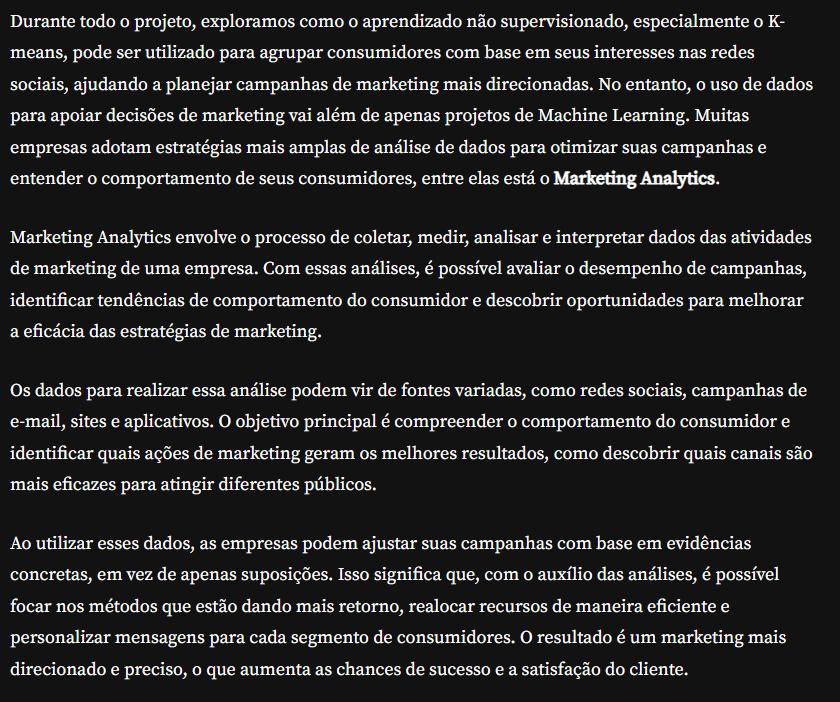

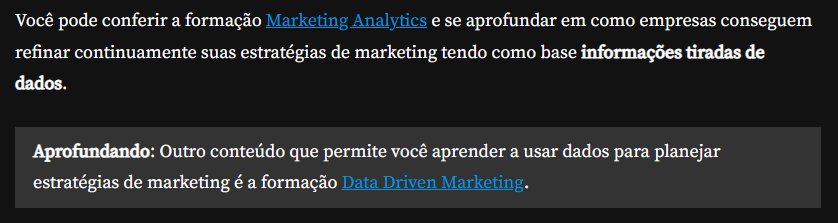

# **FIM**